In [1]:
import msprime
import matplotlib.pyplot as plt
from sympy import symbols, exp
from sympy.plotting import plot

In [2]:
# set sample size and number of trials
n_samples=1
num=10000

In [3]:
# define the function that finds the least coalescent time
def t_mrca_api(tree_s):
    t_ca_list = []
    for tree in tree_s.trees():
        t_ca_list.append(tree_s.tables.nodes[tree.root].time)
    return(min(t_ca_list))

In [4]:
# run the simulation num times
t_mrca_list = []
for idxx in range(num):
    tree_s_sim = msprime.sim_ancestry(
        samples=n_samples,
        # num of recombinations per base per parent? 
        recombination_rate=1e-8,
        sequence_length=5000,
        population_size=10000,
        record_full_arg=True)
    # t_mrca_list.append(t_mrca_text(tree_s_sim.draw_text()))
    t_mrca_list.append(t_mrca_api(tree_s_sim))

Text(0.5, 0, 'Fastest Coalescent Time (?)')

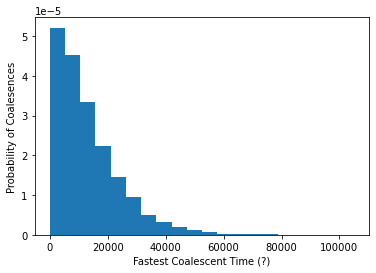

In [5]:
# plot the distribution
plt.hist(t_mrca_list, density=True, bins=20,range=(0,max(t_mrca_list)))
plt.ylabel("Probability of Coalesences")
plt.xlabel("Fastest Coalescent Time (?)")

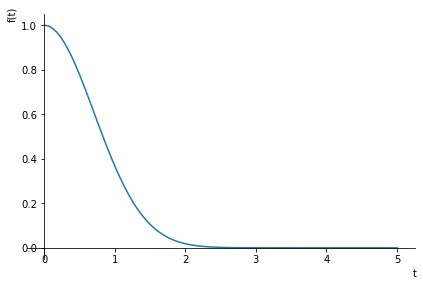

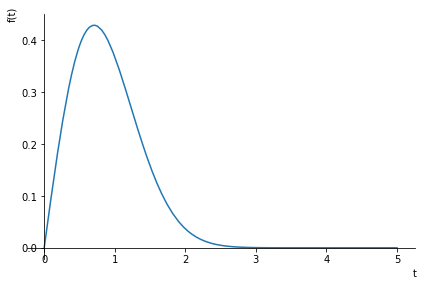

In [6]:
# plot the expectation
# CDF ~ exp(- R t^2 / N)
# PDF ~ t exp(- R t^2 / N)
t=symbols('t')
plot(exp(-t**2),(t,0,5))
plot(t*exp(-t**2),(t,0,5))

# save the data

In [7]:
print(t_mrca_list)

[7333.024694090757, 13384.65002596257, 7992.978235315002, 15491.901268918693, 4473.448978146807, 38569.602563653316, 14670.967941725943, 671.6785621117627, 7126.155497871565, 10914.407173853078, 24346.682181854267, 3682.933071564443, 18723.08918319338, 2871.320660477588, 796.3911807549908, 7091.187319697027, 20205.64959804553, 589.2642505904291, 50631.79052030171, 17626.41519418545, 1804.6686477272697, 5642.5525381873285, 1378.6052671526913, 992.084841124964, 35457.698617371105, 29882.189738147506, 5522.414331812844, 6712.4213556227305, 12055.301138559931, 6126.165318459544, 2791.7896981117706, 48836.75532536897, 8365.407367459919, 6371.327710552185, 10370.75931397447, 6368.829872076065, 729.1849071115856, 8785.913553826651, 13799.058003461883, 10857.55495467033, 26410.5010700313, 12921.03297779572, 19231.874897249236, 7997.365417914985, 7994.919357667049, 3752.553262209004, 187.59394782065382, 5169.034741578815, 7957.900403128629, 9089.657317572697, 21240.28059437408, 639.967338283308

# take a look at the last tree

In [8]:
# print the last tree
print(tree_s_sim.draw_text())

88231.91┊      ┊      ┊      ┊      ┊      ┊  17  ┊  
        ┊      ┊      ┊      ┊      ┊      ┊ ┏━┻┓ ┊  
42000.17┊      ┊      ┊      ┊  16  ┊  16  ┊ 16 ┃ ┊  
        ┊      ┊      ┊      ┊ ┏━┻┓ ┊ ┏━┻┓ ┊ ┃  ┃ ┊  
39590.75┊      ┊      ┊      ┊ ┃ 14 ┊ ┃ 14 ┊ ┃ 15 ┊  
        ┊      ┊      ┊      ┊ ┃  ┃ ┊ ┃  ┃ ┊ ┃  ┃ ┊  
38069.70┊  13  ┊  13  ┊  13  ┊ ┃ 13 ┊ ┃ 13 ┊ ┃ 13 ┊  
        ┊ ┏━┻┓ ┊ ┏━┻┓ ┊ ┏━┻┓ ┊ ┃  ┃ ┊ ┃  ┃ ┊ ┃  ┃ ┊  
36988.99┊ 11 ┃ ┊ 11 ┃ ┊ 11 ┃ ┊ 12 ┃ ┊ 12 ┃ ┊ 12 ┃ ┊  
        ┊ ┃  ┃ ┊ ┃  ┃ ┊ ┃  ┃ ┊ ┃  ┃ ┊ ┃  ┃ ┊ ┃  ┃ ┊  
30643.11┊ ┃ 10 ┊ ┃ 10 ┊ ┃ 10 ┊ ┃ 10 ┊ ┃ 10 ┊ ┃ 10 ┊  
        ┊ ┃  ┃ ┊ ┃  ┃ ┊ ┃  ┃ ┊ ┃  ┃ ┊ ┃  ┃ ┊ ┃  ┃ ┊  
29897.84┊ ┃  9 ┊ ┃  9 ┊ ┃  9 ┊ ┃  9 ┊ ┃  ┃ ┊ ┃  ┃ ┊  
        ┊ ┃  ┃ ┊ ┃  ┃ ┊ ┃  ┃ ┊ ┃  ┃ ┊ ┃  ┃ ┊ ┃  ┃ ┊  
29398.66┊ ┃  ┃ ┊ ┃  ┃ ┊ ┃  7 ┊ ┃  7 ┊ ┃  8 ┊ ┃  8 ┊  
        ┊ ┃  ┃ ┊ ┃  ┃ ┊ ┃  ┃ ┊ ┃  ┃ ┊ ┃  ┃ ┊ ┃  ┃ ┊  
15786.42┊ 6  ┃ ┊ 6  ┃ ┊ 6  ┃ ┊ 6  ┃ ┊ 6  ┃ ┊ 6  ┃ ┊  
        ┊ ┃  ┃ ┊ ┃  ┃ ┊ ┃  ┃ ┊ ┃  ┃ ┊ ┃  ┃ ┊ ┃  ┃ ┊  
11728.95┊ 4  ┃ ┊ 5  ┃ ┊ 5  ┃